This notebook evaluates the results from the 'attributesAnalyser' on the test set

In [ ]:
#import test set from csv
import pandas as pd
colnames=["post_id","post_text","craving","craving_rate","alone", "friends", "friend", "family", "partner", "colleague", "strangers", "social_rate","home", "school", "work", "restaurant", "bar", "pub", "party", "workout", "supermarket", "outdoors", "liquor_store", "airport", "vacation", "other", "location_rate", "anxious", "sad", "stressed", "tired", "frustrated", "happy", "angry", "proud", "bored","emotion_rate"] 
gold_labels =  pd.read_csv("Data/craving_test_set.csv", names = colnames)
gold_labels = gold_labels.drop([0, 1])
drop_columns = ['post_id','craving_rate', 'social_rate','location_rate','emotion_rate']
gold_labels = gold_labels.drop(columns= drop_columns).reset_index(drop=True)
features = [x for x in colnames if x not in drop_columns][1:]
for column in features:
    gold_labels[column] = gold_labels[column].apply(lambda x: False if (x == '000') | (x == '00') else True)
#gold_labels[features] = gold_labels[features].apply(lambda x: False if (x == '000') | (x == '00') else True)

gold_labels = gold_labels.iloc[1:, :]
gold_labels

,post_text,craving,alone,friends,friend,family,partner,colleague,strangers,home,...,other,anxious,sad,stressed,tired,frustrated,happy,angry,proud,bored
1,How do you celebrate milestones/goal achieveme...,True,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,False,False,False,False
2,Tomorrow’s my birthday and it’s triggering mem...,False,True,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,True,False
3,I have noticed even my sense of humor has matu...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,I got a reality check tonight.\nI was eating d...,True,False,False,True,False,True,True,False,True,...,False,True,False,False,False,False,False,False,False,False
5,Struggling when I should be happy?\nToday I'm ...,True,False,False,False,False,True,False,False,True,...,False,True,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,"First temptation\nYesterday, I received word t...",True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
347,I feel like im going to relapse again\nIm feel...,True,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,False
348,"Had a booze dream, wasn't even that interested...",True,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
349,"This is the day\nOn this day, cinco de mayo, w...",True,True,False,False,True,True,False,False,False,...,False,True,True,False,False,False,False,False,False,True


In [ ]:
#summarise certain attributes to one (e.g. bar and restaurant is merged to one category)
gold_labels['restaurant'] = gold_labels['restaurant']|gold_labels['bar']
gold_labels['frustrated'] = gold_labels['frustrated']|gold_labels['angry']
gold_labels['friend'] = gold_labels['friends']|gold_labels['friend']
gold_labels['university'] = gold_labels['school']
gold_labels

,post_text,craving,alone,friends,friend,family,partner,colleague,strangers,home,...,anxious,sad,stressed,tired,frustrated,happy,angry,proud,bored,university
1,How do you celebrate milestones/goal achievement without drinking (or doing something else unhea...,True,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,Tomorrow’s my birthday and it’s triggering memories\nLast year on my birthday I got toasted with...,False,True,True,True,False,True,False,False,False,...,False,False,False,False,True,False,True,True,False,False
3,"I have noticed even my sense of humor has matured dramatically since I quit. Anyways, it's day 6...",True,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,I got a reality check tonight.\nI was eating dinner tonight when I got a text message from a fri...,True,False,False,True,False,True,True,False,True,...,True,False,False,False,False,False,False,False,False,False
5,"Struggling when I should be happy?\nToday I'm 15 days sober. I made it two weeks when I started,...",True,False,False,False,False,True,False,False,True,...,True,False,False,False,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,"First temptation\nYesterday, I received word that the business I work for would be reopening Mon...",True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
347,I feel like im going to relapse again\nIm feeling reqlly stressed out right now to the point tha...,True,False,False,False,False,False,False,False,False,...,False,True,True,True,True,False,False,False,False,False
348,"Had a booze dream, wasn't even that interested in booze even in my wildest imagination\nI think ...",True,False,False,False,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
349,"This is the day\nOn this day, cinco de mayo, when so many will poison themselves in the name of ...",True,True,False,False,True,True,False,False,False,...,True,True,False,False,False,False,False,False,True,False


In [ ]:
pred_labels = pd.read_csv("Data/craving_test_set_predictions.csv")
pred_labels['craving'] = True
pred_labels = pred_labels.iloc[1: , :]
pred_labels

,processed_post,post,alone,friend,family,partner,colleague,home,university,work,...,sad,stressed,tired,frustrated,happy,proud,bored,weekend,smoke,craving
1,celebrate milestone goal achievement without drinking something else unhealthy hard time finding...,How do you celebrate milestones/goal achievement without drinking (or doing something else unhea...,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True
2,tomorrow birthday triggering memory last year birthday got toasted friend hurricane going year h...,Tomorrow’s my birthday and it’s triggering memories\nLast year on my birthday I got toasted with...,True,True,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
3,noticed even sense humor matured dramatically since quit anyways day 69 lmfao seriousness tomorr...,"I have noticed even my sense of humor has matured dramatically since I quit. Anyways, it's day 6...",False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,got reality check tonight eating dinner tonight got text message friend mine informed mutual fri...,I got a reality check tonight.\nI was eating dinner tonight when I got a text message from a fri...,False,True,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
5,struggling happy today 15 day sober made two week started false belief could moderate proved idi...,"Struggling when I should be happy?\nToday I'm 15 days sober. I made it two weeks when I started,...",False,False,True,True,False,True,False,False,...,False,False,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,first temptation yesterday received word business work would reopening monday actually back work...,"First temptation\nYesterday, I received word that the business I work for would be reopening Mon...",False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
347,feel like im going relapse im feeling reqlly stressed right point sleep huge headache want throw...,I feel like im going to relapse again\nIm feeling reqlly stressed out right now to the point tha...,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,True,True
348,booze dream even interested booze even wildest imagination think must triggered visit grocery st...,"Had a booze dream, wasn't even that interested in booze even in my wildest imagination\nI think ...",False,False,False,False,False,True,False,True,...,False,False,False,False,True,False,False,False,False,True
349,day day cinco de mayo many poison name fun choosing stop drinking sincere intention never allow ...,"This is the day\nOn this day, cinco de mayo, when so many will poison themselves in the name of ...",True,True,True,False,False,False,False,True,...,True,False,False,False,False,False,True,False,False,True


In [ ]:
#the test set was not created with the latest query, it hence still detects 'surgery' and 'burger' as 'urge' and therefore as a craving, we change that manually
pred_labels.loc[(pred_labels['craving']!=gold_labels['craving']) & ((pred_labels['processed_post'].str.contains('surgery')) | (pred_labels['processed_post'].str.contains('burger'))),'craving'] = False
pred_labels.loc[pred_labels['craving'] != True]

,processed_post,post,alone,friend,family,partner,colleague,home,university,work,...,sad,stressed,tired,frustrated,happy,proud,bored,weekend,smoke,craving
51,stopping today come realization addicted alcohol problem drink point would hit rock bottom also ...,Stopping today.\nI have come to the realization that I’m addicted to alcohol. The problem I have...,False,True,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
89,30 day today sober 30 day quit help support wife need lose weight get knee replacement surgery h...,30 days today\nI've been sober for 30 days I quit to help support my wife . She needs to lose so...,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
173,cant blame everything drinking head used blame drunk everything rightfully big stuff little stuf...,"Cant blame EVERYTHING on drinking\nIn my head, I used to blame being drunk on everything, and ri...",False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
350,sober cake day reddit long time 8 year today sober cake day day one new reddit user cptcatsnacks...,My Sober Cake Day\nI have been on Reddit for a long time. 8 years?\n\nToday is my sober cake day...,False,True,True,True,False,False,False,True,...,False,True,False,False,True,False,False,False,False,False


In [ ]:
from contextlib import nullcontext
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from numpy import argmax
import numpy as np

# Test the model
for col in pred_labels.columns[2:]:
        if(col in gold_labels.columns):
                print(col, 'scores ',gold_labels[col].value_counts().get(True, 0))
                y_pred = pred_labels[col]
                y_te = gold_labels[col]
                TN, FP, FN, TP = confusion_matrix(y_te, y_pred).ravel()
                print("\t",round(accuracy_score(y_te, y_pred)*100,2),"&",round(precision_score(y_te, y_pred)*100,2),"&",round(recall_score(y_te, y_pred)*100,2),"&",round(f1_score(y_te, y_pred)*100,2))
                print("\tTP",TP,"TN",TN)
                print("\tFP",FP,"FN",FN)
                print('\tPrecision score %s' % round(precision_score(y_te, y_pred)*100,2))
                print('\tRecall score %s' % round(recall_score(y_te, y_pred)*100,2))
                print('\tF1-score score %s' % round(f1_score(y_te, y_pred)*100,2))
                print('\tAccuracy score %s' % round(accuracy_score(y_te, y_pred)*100,2))

alone scores  43
	 92.57 & 69.77 & 69.77 & 69.77
	TP 30 TN 294
	FP 13 FN 13
	Precision score 69.77
	Recall score 69.77
	F1-score score 69.77
	Accuracy score 92.57
friend scores  71
	 94.86 & 85.33 & 90.14 & 87.67
	TP 64 TN 268
	FP 11 FN 7
	Precision score 85.33
	Recall score 90.14
	F1-score score 87.67
	Accuracy score 94.86
family scores  84
	 92.29 & 86.08 & 80.95 & 83.44
	TP 68 TN 255
	FP 11 FN 16
	Precision score 86.08
	Recall score 80.95
	F1-score score 83.44
	Accuracy score 92.29
partner scores  77
	 95.71 & 94.29 & 85.71 & 89.8
	TP 66 TN 269
	FP 4 FN 11
	Precision score 94.29
	Recall score 85.71
	F1-score score 89.8
	Accuracy score 95.71
colleague scores  17
	 95.71 & 62.5 & 29.41 & 40.0
	TP 5 TN 330
	FP 3 FN 12
	Precision score 62.5
	Recall score 29.41
	F1-score score 40.0
	Accuracy score 95.71
home scores  93
	 91.43 & 84.62 & 82.8 & 83.7
	TP 77 TN 243
	FP 14 FN 16
	Precision score 84.62
	Recall score 82.8
	F1-score score 83.7
	Accuracy score 91.43
university scores  14
	 97.14

In [ ]:
test_set = pd.concat([gold_labels, pred_labels], axis=1)
test_set.to_csv('full_test_set.csv', header=True, index=False)

Correlation analysis of features (e.g. does party occur more often that expected with friends?)

In [ ]:
craving_set =  pd.read_csv("Data/craving_set.csv")
craving_set

,processed_post,post,alone,friend,family,partner,colleague,home,university,work,...,anxious,sad,stressed,tired,frustrated,happy,proud,bored,weekend,smoke
0,fuck everything white lightning experience sev...,In which I fuck everything up and then have a ...,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,relapsed happened thursday night alcohol actua...,I relapsed….\nIt happened Thursday night. It w...,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,went drink friend last night embarrassing fast...,Went for a drink with a friend last night and ...,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
3,daily check friday march 25th today drinking m...,"The Daily Check-In for Friday, March 25th: Jus...",True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True
4,know better kind scare drink sober wake see cl...,I Know I Can Do Better\nAnd it kind of scares ...,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24430,successful day 3 30 day abstinence promise day...,Successful Day 3 of the 30-day Abstinence prom...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24431,hanging drinking buddy 15 year tonight everybo...,Hanging with my drinking buddy of 15 years ton...,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
24432,day 5 challenge coming soon started new path p...,Day 5 - Challenges coming soon\nStarted on thi...,True,False,True,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
24433,drank 6 bud light last night gf left work work...,Drank 6 bud lights last night after my gf left...,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#show all different combinations and how often they appear
grouped_values = craving_set.groupby(["alone", "friend", "family", "partner", "colleague", "home", "university", "work", "restaurant", "party", "workout", "supermarket", "airport", "anxious", "sad", "stressed", "tired", "frustrated", "happy", "proud", "bored","weekend","smoke"]).count()
grouped_values[grouped_values.post > 1].sort_values(by=['post'], ascending=False)

processed_post  \
alone friend family partner colleague home  university work  restaurant party workout supermarket airport anxious sad   stressed tired frustrated happy proud bored weekend smoke                   
False False  False  False   False     False False      False False      False False   False       False   False   False False    False False      False False False False   False            1400   
                                                       True  False      False False   False       False   False   False False    False False      False False False False   False             339   
                                                       False False      False False   False       False   True    False False    False False      False False False False   False             339   
                                                                                                          False   False False    False False      True  False False False   False             241   
                                                                                                                                                  False False False True    False             153   
...                                                                                                                                                                                           ...   
      True   False  False   False     False False      False False      False True    False       False   True    False False    False False      False False False True    False               2   
                                                                                                          False   False False    False False      True  False False True    False               2   
      False  False  False   False     True  True       True  False      False False   True        False   True    False False    False False      False False False True    False               2   
      True   False  False   False     False False      False False      False True    False       False   False   False False    False False      False False True  False   False               2   
                    True    False     False False      False False      False False   False       False   False   True  False    False False      False False False False   False               2   

                                                                                                                                                                                   post  
alone friend family partner colleague home  university work  restaurant party workout supermarket airport anxious sad   stressed tired frustrated happy proud bored weekend smoke        
False False  False  False   False     False False      False False      False False   False       False   False   False False    False False      False False False False   False  1400  
                                                       True  False      False False   False       False   False   False False    False False      False False False False   False   339  
                                                       False False      False False   False       False   True    False False    False False      False False False False   False   339  
                                                                                                          False   False False    False False      True  False False False   False   241  
                                                                                                                                                  False False False True    False   153  
...                                                                                                                                                                                 ...  
      True   False  False   False     False False      False False      False True    False       False   True    False False    

In [ ]:
grouped_values.to_csv('cooc_analysis.csv', header=True)

In [ ]:
#calculate the dot product and divide it by the diagonal values. This way, each row shows us whether the row word appears more often than other words with the column word if the value is higher than the rest of the row values
cooc_labels = ["alone", "friend", "family", "partner", "home", "work", "restaurant", "party", "workout", "supermarket", "anxious", "sad", "stressed", "tired", "frustrated", "happy", "proud", "bored","weekend","smoke"]
cravings_int = craving_set[cooc_labels].astype(int)
coocc = cravings_int.T.dot(cravings_int)
diagonal = np.diag(coocc)
coocc /= diagonal#craving_set.shape[0] #coocc.sum(axis=1)
coocc #= coocc.T / diagonal
#coocc *= 10000
#coocc = np.fill_diagonal(coocc.values, 0)

,alone,friend,family,partner,home,work,restaurant,party,workout,supermarket,anxious,sad,stressed,tired,frustrated,happy,proud,bored,weekend,smoke
alone,1.000000,0.305136,0.270391,0.268937,0.280076,0.244741,0.302934,0.331130,0.292118,0.282221,0.252296,0.343191,0.296143,0.292655,0.306978,0.261831,0.291074,0.351638,0.262338,0.272975
friend,0.568223,1.000000,0.493831,0.470330,0.464203,0.429019,0.600000,0.655020,0.504331,0.439633,0.441677,0.492405,0.474609,0.464859,0.486657,0.471819,0.488351,0.502077,0.485811,0.480599
family,0.536491,0.526168,1.000000,0.593617,0.506718,0.457478,0.487775,0.566887,0.488740,0.477585,0.457223,0.500336,0.514893,0.503051,0.524780,0.481332,0.501059,0.454084,0.485811,0.490470
partner,0.542384,0.509372,0.603381,1.000000,0.508713,0.465561,0.503912,0.559647,0.485275,0.488283,0.463315,0.506520,0.515869,0.512316,0.543676,0.488823,0.501362,0.465621,0.483498,0.471409
home,0.604714,0.538218,0.551405,0.544617,1.000000,0.534521,0.605134,0.598048,0.572759,0.639328,0.486226,0.525339,0.582031,0.581695,0.571855,0.514269,0.545234,0.572681,0.549506,0.525868
work,0.672484,0.633033,0.633539,0.634300,0.680244,1.000000,0.671149,0.643059,0.706150,0.669638,0.607055,0.638930,0.725586,0.680904,0.666335,0.627229,0.643873,0.701431,0.632943,0.634105
restaurant,0.280825,0.298685,0.227896,0.231625,0.259815,0.226429,1.000000,0.377085,0.283456,0.267702,0.214929,0.229601,0.258545,0.241356,0.253771,0.250535,0.272012,0.287956,0.267119,0.257999
party,0.238441,0.253286,0.205735,0.199820,0.199454,0.168523,0.292910,1.000000,0.220225,0.190779,0.181016,0.201102,0.197998,0.208814,0.200398,0.204637,0.228139,0.236271,0.234423,0.206943
workout,0.305757,0.283471,0.257825,0.251854,0.277661,0.268993,0.320049,0.320113,1.000000,0.306928,0.250659,0.276381,0.318359,0.310734,0.285927,0.284304,0.309228,0.386710,0.296576,0.301566
supermarket,0.251133,0.210078,0.214188,0.215442,0.263489,0.216861,0.256968,0.235757,0.260935,1.000000,0.198109,0.216965,0.253906,0.254463,0.245317,0.216885,0.261725,0.258422,0.245836,0.237577


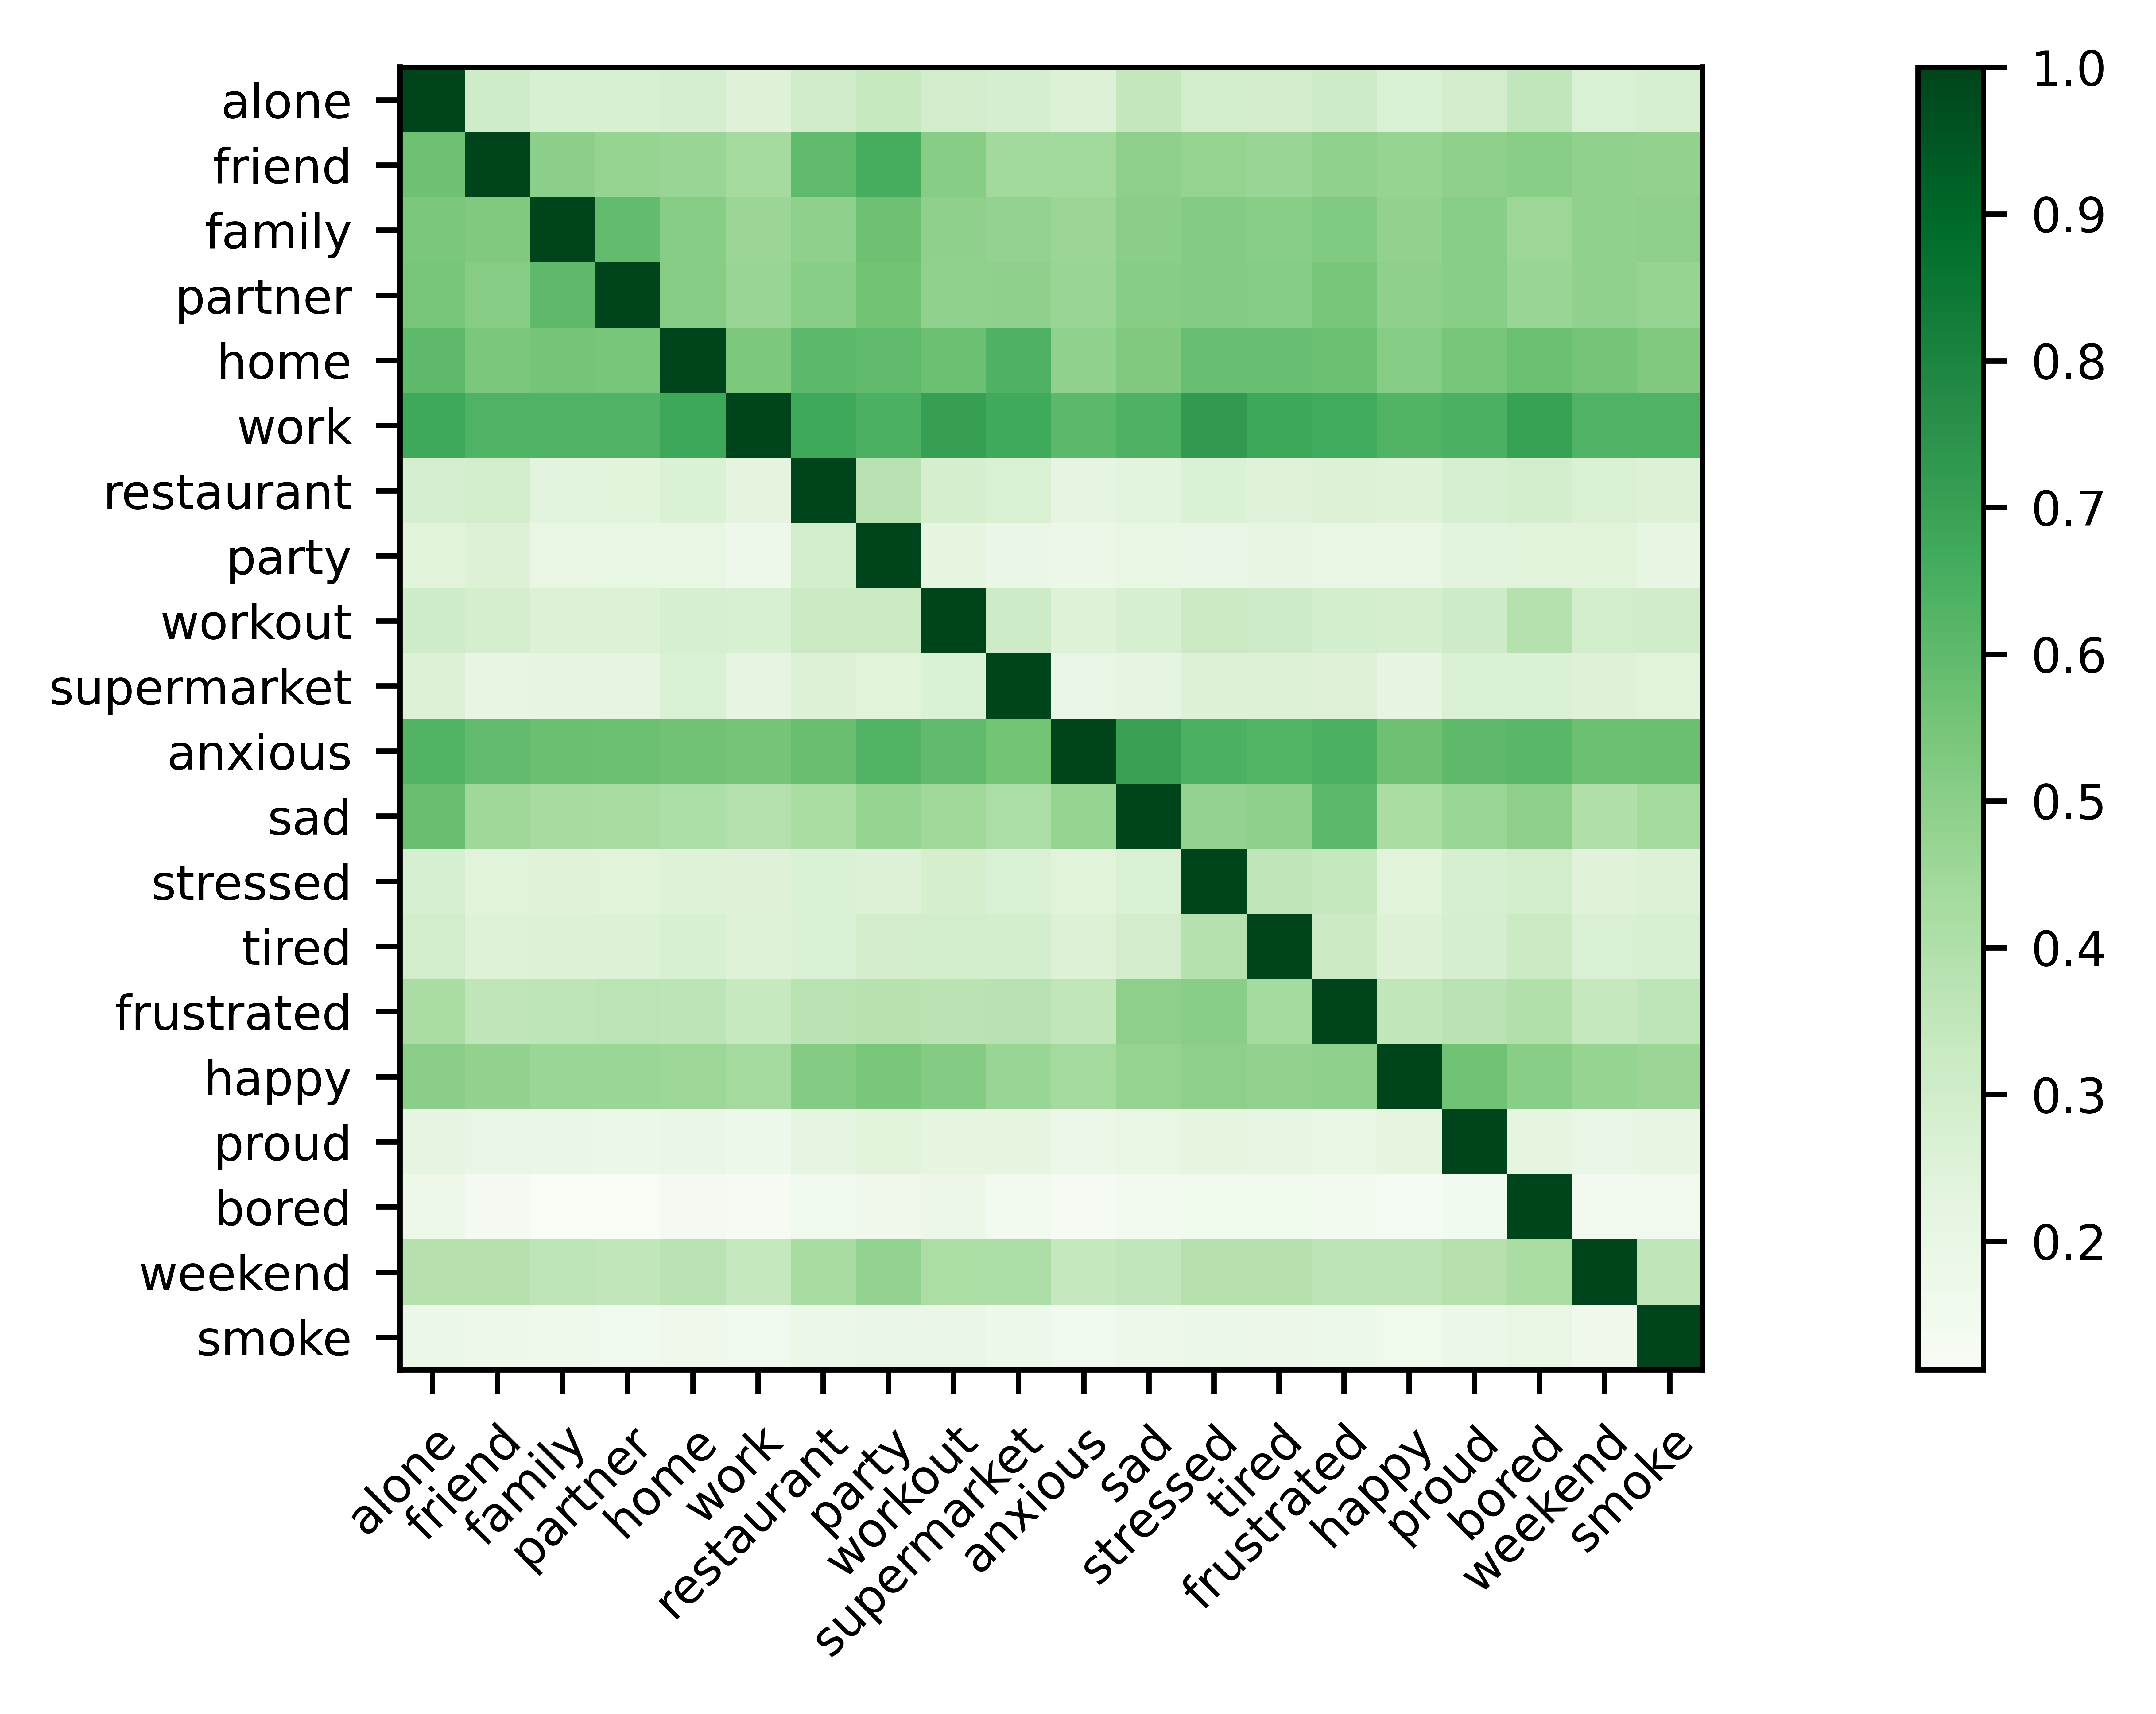

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams.update({'font.size': 7})
fig, ax = plt.subplots()
img = ax.imshow(coocc,interpolation='nearest', cmap='Greens')

ax.set_xticks(np.arange(len(cooc_labels)))
ax.set_yticks(np.arange(len(cooc_labels)))
ax.set_xticklabels(cooc_labels)
ax.set_yticklabels(cooc_labels)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
fig.set_size_inches(9, 3.5)
fig.set_dpi(1600)
fig.colorbar(img)
fig.tight_layout()
plt.show()
